In [87]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [88]:
df = pd.read_csv('/content/sample_data/D3.csv')
print(df)
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df) 
M

          X1        X2        X3         Y
0   0.000000  3.440000  0.440000  4.387545
1   0.040404  0.134949  0.888485  2.679650
2   0.080808  0.829899  1.336970  2.968490
3   0.121212  1.524848  1.785455  3.254065
4   0.161616  2.219798  2.233939  3.536375
..       ...       ...       ...       ...
95  3.838384  1.460202  3.046061 -4.440595
96  3.878788  2.155152  3.494545 -4.458663
97  3.919192  2.850101  3.943030 -4.479995
98  3.959596  3.545051  0.391515 -3.304593
99  4.000000  0.240000  0.840000 -5.332455

[100 rows x 4 columns]


100

In [89]:
X = df.values[:,0:3]  # get input values from first column 
y = df.values[:, 3]  # get output values from second column 
m = len(y) # Number of training examples 
print('X = ', X[: 5]) # Show only first 5 records 
print('y = ', y[: 5]) 
print('m = ', m) 

X =  [[0.         3.44       0.44      ]
 [0.04040404 0.1349495  0.88848485]
 [0.08080808 0.82989899 1.3369697 ]
 [0.12121212 1.52484848 1.78545454]
 [0.16161616 2.21979798 2.23393939]]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


In [90]:
X = df.values[:, 0:3]  # get input values from first column 
y = df.values[:, 3]  # get output values from second column 
m = len(y) # Number of training examples 
print('X = ', X[:]) # Show only first 5 records 
print('y = ', y[:]) 
print('m = ', m) 

X =  [[0.         3.44       0.44      ]
 [0.04040404 0.1349495  0.88848485]
 [0.08080808 0.82989899 1.3369697 ]
 [0.12121212 1.52484848 1.78545454]
 [0.16161616 2.21979798 2.23393939]
 [0.2020202  2.91474747 2.68242424]
 [0.24242424 3.60969697 3.13090909]
 [0.28282828 0.30464646 3.57939394]
 [0.32323232 0.99959596 0.02787879]
 [0.36363636 1.69454546 0.47636364]
 [0.4040404  2.38949495 0.92484849]
 [0.44444444 3.08444444 1.37333333]
 [0.48484848 3.77939394 1.82181818]
 [0.52525252 0.47434343 2.27030303]
 [0.56565657 1.16929293 2.71878788]
 [0.60606061 1.86424242 3.16727273]
 [0.64646465 2.55919192 3.61575758]
 [0.68686869 3.25414141 0.06424242]
 [0.72727273 3.94909091 0.51272727]
 [0.76767677 0.6440404  0.96121212]
 [0.80808081 1.3389899  1.40969697]
 [0.84848485 2.03393939 1.85818182]
 [0.88888889 2.72888889 2.30666667]
 [0.92929293 3.42383838 2.75515152]
 [0.96969697 0.11878788 3.20363636]
 [1.01010101 0.81373737 3.65212121]
 [1.05050505 1.50868687 0.10060606]
 [1.09090909 2.20363636

In [91]:
#Lets create a matrix with single column of ones 
X_0 = np.ones((m, 1)) 
X_0[:5] 

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [92]:
# Using reshape function convert X 1D array to 2D array of dimension 100X1 
X_1 = X.reshape(m, 3) 
X_1[:10] 

array([[0.        , 3.44      , 0.44      ],
       [0.04040404, 0.1349495 , 0.88848485],
       [0.08080808, 0.82989899, 1.3369697 ],
       [0.12121212, 1.52484848, 1.78545454],
       [0.16161616, 2.21979798, 2.23393939],
       [0.2020202 , 2.91474747, 2.68242424],
       [0.24242424, 3.60969697, 3.13090909],
       [0.28282828, 0.30464646, 3.57939394],
       [0.32323232, 0.99959596, 0.02787879],
       [0.36363636, 1.69454546, 0.47636364]])

In [93]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column 
# This will be our final X matrix (feature matrix) 
X = np.hstack((X_0, X_1)) 
X[:5] 

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [94]:
theta = np.zeros(4) 
theta 

array([0., 0., 0., 0.])

In [95]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 
  

In [96]:
# Lets compute the cost for theta values 
cost = compute_cost(X, y, theta) 
print('The cost for given values of theta_0 and theta_1 =', cost) 

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [97]:
def gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
  ef gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  cost_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history 

In [98]:
theta = [0., 0.,0.,0.] 
iterations = 1500; 
alpha = 0.01;

In [99]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history) 

Final value of theta = [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
cost_history = [5.21542243 4.97171977 4.7765543  ... 0.81079843 0.81065429 0.81051044]


Text(0.5, 1.0, 'Convergence of gradient descent')

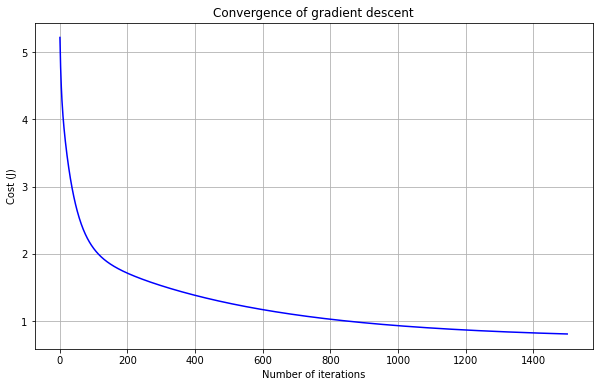

In [100]:
plt.plot(range(1, iterations + 1),cost_history, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 

In [104]:
#predicting values for Y 
sum_1=theta[1]*(1) + theta[2]*(1) + theta[3]*(1) + theta[0]
print(sum_1)

sum_2=theta[1]*(2) + theta[2]*(0) + theta[3]*(4) + theta[0]
print(sum_2)

sum_3=theta[1]*(3) + theta[2]*(2) + theta[3]*(1) + theta[0]
print(sum_1)

2.9413640816645295
0.09179843075891547
2.9413640816645295
